In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing the packages that I will use to load datasets(pandas), run statistical analysis(numpy), and make
#graphs/data visualization(matplotlib)

In [2]:
df = pd.read_csv(r'/Users/jankrovatin/Desktop/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days_JK.csv')
#loading the dataset that I will analyze

In [3]:
df
df = df.dropna()
#viewing my dataset to ensure it is correct

In [4]:
df.columns
#extracting column names so I can be sure they are correct in analysis section

Index(['Phase', 'Indicator', 'Group', 'State', 'Subgroup', 'Time Period',
       'Time Period Label', 'Value'],
      dtype='object')

In [5]:
#creating a new category for my frequency data to categorize data from the original dataset

table = df[['Phase','Group','Subgroup','Value']]

def function(row):
    if row['Subgroup'] == 'Hispanic or Latino':
        return 'Hispanic'
    elif row['Subgroup'] == 'Non-Hispanic white, single race':
        return 'White'
    elif row['Subgroup'] == 'Non-Hispanic black, single race':
        return 'Black'
    elif row['Subgroup'] == 'Non-Hispanic Asian, single race':
        return 'Asian'
    elif row['Subgroup']== 'Non-Hispanic, other races and multiple races':
        return 'Other'
    else:
        return 'NaN'

In [6]:
#reordering table so it is viewable how I want
table['Race'] = table.apply(function, axis=1)

<ipython-input-6-a560cf64316c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Race'] = table.apply(function, axis=1)


In [7]:
#dropping NaNs and viewing the table
table.dropna()
table

,Phase,Group,Subgroup,Value,Race
0,Two,By Age,18 - 29 years,35.4,NaN
1,Two,By Age,30 - 39 years,27.9,NaN
2,Two,By Age,40 - 49 years,23.8,NaN
3,Two,By Age,50 - 59 years,23.8,NaN
4,Two,By Age,60 - 69 years,19.7,NaN
...,...,...,...,...,...
3985,One,By State,Washington,43.8,NaN
3986,One,By State,West Virginia,37.0,NaN
3987,One,By State,Wisconsin,33.3,NaN
3988,One,By State,Wyoming,41.3,NaN


In [8]:
#creating values to analyze averages in different racial populations

black_df = table[table['Race']=='Black']

phase_list = ['One','Two','Three']
black_value = []
for phase in phase_list:
    df1 = black_df[black_df['Phase']== phase]
    value = np.mean(df1['Value'])
    black_value.append(value)
print(black_value)
# black_value list represents the mean Value for phase one, two and three (in this order)

[34.227777777777774, 32.83333333333333, 38.24999999999999]


In [9]:
hispanic_df = table[table['Race']=='Hispanic']

phase_list = ['One','Two','Three']
hispanic_value = []
for phase in phase_list:
    df1 = hispanic_df[hispanic_df['Phase']== phase]
    value = np.mean(df1['Value'])
    hispanic_value.append(value)
print(hispanic_value)
# hispaninc_value list represents the mean Value for phase one, two and three (in this order)

[35.99722222222222, 36.24, 41.03333333333333]


In [10]:
white_df = table[table['Race']=='White']

phase_list = ['One','Two','Three']
white_value = []
for phase in phase_list:
    df1 = white_df[white_df['Phase']== phase]
    value = np.mean(df1['Value'])
    white_value.append(value)
print(white_value)
# white_value list represents the mean Value for phase one, two and three (in this order)

[29.658333333333335, 30.026666666666674, 34.03333333333333]


In [11]:
asian_df = table[table['Race']=='Asian']

phase_list = ['One','Two','Three']
asian_value = []
for phase in phase_list:
    df1 = asian_df[asian_df['Phase']== phase]
    value = np.mean(df1['Value'])
    asian_value.append(value)
print(asian_value)
# asian_value list represents the mean Value for phase one, two and three (in this order)

[27.03055555555555, 25.34, 27.53333333333333]


In [12]:
other_df = table[table['Race']=='Other']

phase_list = ['One','Two','Three']
other_value = []
for phase in phase_list:
    df1 = other_df[other_df['Phase']== phase]
    value = np.mean(df1['Value'])
    other_value.append(value)
print(other_value)
# other_value list represents the mean Value for phase one, two and three (in this order)

[40.07777777777777, 39.37333333333333, 43.76666666666667]


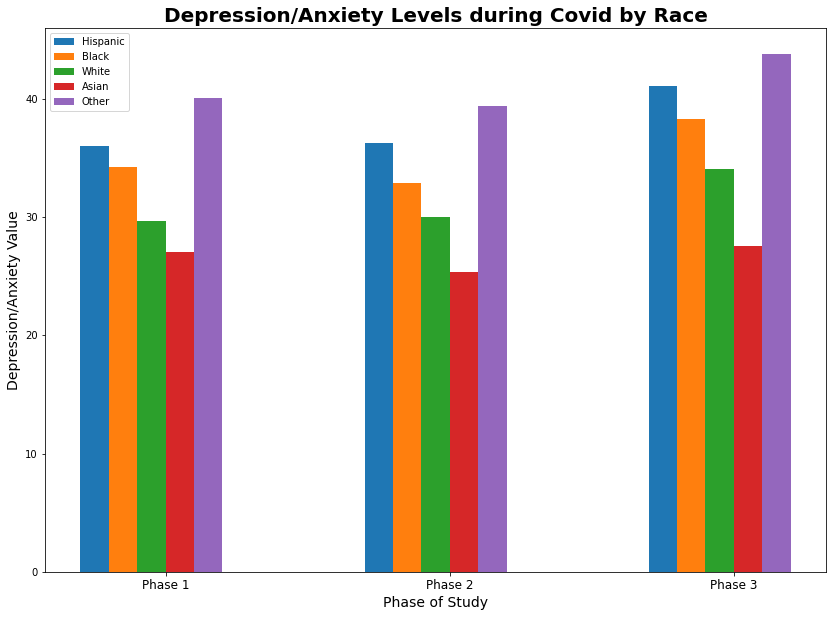

In [13]:
labels = ['Phase 1','Phase 2', 'Phase 3'] #labeling x-axis
y_value1 = hispanic_value #y-values from 1st category
y_value2 = black_value #y-values from 2nd category
y_value3 = white_value#y-values from 3rd category
y_value4 = asian_value #y-values from 4th category
y_value5 = other_value#y-values from 5th category

x = np.arange(len(labels))
width = 0.1  #adjusting the width of the bars to all categoires nicely

fig, ax = plt.subplots(figsize=(14,10))#creating a grouped barchart
ax.bar(x, y_value1, width, label='Hispanic')
ax.bar(x + width, y_value2, width, label='Black')
ax.bar(x + 2 * width, y_value3, width, label='White')
ax.bar(x + 3 * width, y_value4, width, label='Asian') #adding different categories as separate bars
ax.bar(x + 4 * width, y_value5, width, label='Other')

ax.set_ylabel('Depression/Anxiety Value', fontsize=14)#y-axis labe
ax.set_xlabel('Phase of Study', fontsize=14)#x-axis label
ax.set_title('Depression/Anxiety Levels during Covid by Race',
             fontsize=20, fontweight='bold')#title
ax.set_xticks(x + (5*width)/2) #tick numbers match number of categoires
ax.set_xticklabels(labels, fontsize=12)
ax.legend()


plt.show()

In [14]:
#this stacked bar chart creates a visual representation of different levels of anxiety/depression
#among different population groups during the covid-19 pandemic

In [15]:
#finding mean of all anxiety/depression values to compare to individual group values

a = np.mean(asian_value)
b= np.mean (white_value)
c = np.mean (black_value)
d=np.mean (hispanic_value)
e = np.mean(other_value)

np.mean([a,b,c,d,e])

34.361444444444444

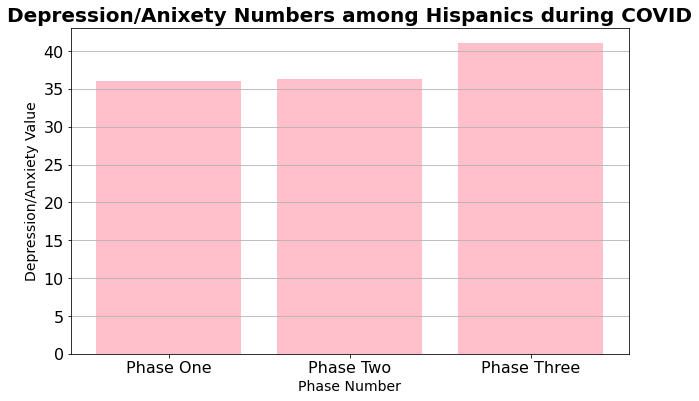

In [16]:
#here I'm going to do a simple t-test to compare the average depression/anxiety among the Hispanic population
#compared to the mean value of the entire population sampled to see if the Hispanic population experiences
#significantly higher values of Anxiety/Depression

x_values = ['Phase One', 'Phase Two', 'Phase Three'] #specify which values go on the x-axis
y_values = hispanic_value #specifcy which values go on the y-axis

fig, axs = plt.subplots(figsize=(10,6))    
axs.bar(x_values, y_values, color=('pink'))   
axs.set_title("Depression/Anixety Numbers among Hispanics during COVID", 
              fontsize=20, fontweight="bold")   
axs.set_xlabel("Phase Number", fontsize=14)
axs.set_ylabel("Depression/Anxiety Value", fontsize=14)
axs.tick_params(labelsize=16)  
plt.grid(axis='y')
plt.show() 

In [17]:
#Here I will be conducting a 2 way t-test to determine if there is a significant difference between
#values of anxiety and depression in the White and Black populations during covid in the US

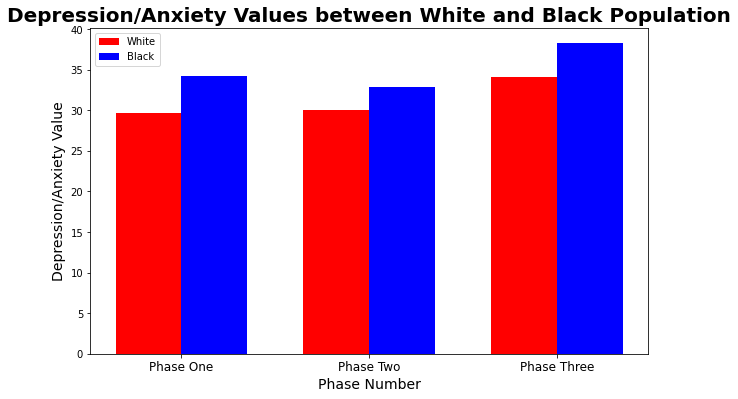

In [18]:
labels = ['Phase One', 'Phase Two', 'Phase Three']
y_value1 = white_value #y-values from 1st category
y_value2 = black_value #y-values from 2nd category

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, y_value1, width, label='White', color='red') #adding values and changing colors to differentiate
ax.bar(x + width/2, y_value2, width, label='Black', color='blue')


ax.set_ylabel('Depression/Anxiety Value', fontsize=14)
ax.set_xlabel('Phase Number', fontsize=14)
ax.set_title('Depression/Anxiety Values between White and Black Population',
             fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend() #this coed adds a legend to my graph


plt.show()

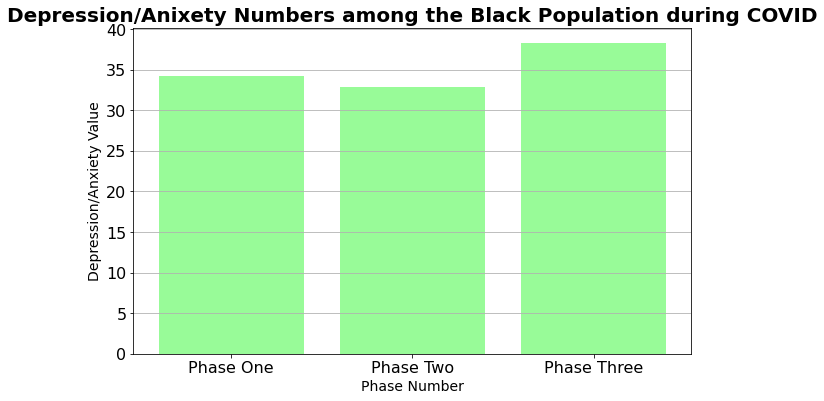

In [19]:
#conducting another one-way t-test to determine if there is significant difference in levels of
#anxiety and depression among the Black population given that the cases/deaths among the 
#Black population has been reported as higher compared to the rest of the population groups

x_values = ['Phase One', 'Phase Two', 'Phase Three']
y_values = black_value

fig, axs = plt.subplots(figsize=(10,6))      
axs.bar(x_values, y_values, color=('palegreen')) 
axs.set_title("Depression/Anixety Numbers among the Black Population during COVID", 
              fontsize=20, fontweight="bold")   
axs.set_xlabel("Phase Number", fontsize=14)
axs.set_ylabel("Depression/Anxiety Value", fontsize=14)
axs.tick_params(labelsize=16)  
plt.grid(axis='y')
plt.show() 

In [20]:
#loading the second dataset I will use for my regression analysis
df2 = pd.read_csv(r'/Users/jankrovatin/Downloads/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv')

In [21]:
#dropping NaNs from dataset and viewing dataframe

df2.dropna()
df2

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,Alabama,2019,1,2019-01-05,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0
1,Alabama,2019,2,2019-01-12,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0
2,Alabama,2019,3,2019-01-19,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0
3,Alabama,2019,4,2019-01-26,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0
4,Alabama,2019,5,2019-02-02,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,United States,2020,97,2020-11-07,61888.0,58383.0,699.0,11049.0,1760.0,2497.0,734.0,2641.0,748.0,928.0,2935.0,12099.0,2900.0,7876.0,7065.0
5450,United States,2020,98,2020-11-14,61902.0,58743.0,707.0,10809.0,1735.0,2540.0,760.0,2483.0,777.0,907.0,2857.0,11757.0,2881.0,9381.0,8449.0
5451,United States,2020,99,2020-11-21,60951.0,58278.0,660.0,10303.0,1731.0,2399.0,727.0,2428.0,763.0,872.0,2968.0,11232.0,2747.0,10944.0,9931.0
5452,United States,2020,100,2020-11-28,55185.0,53034.0,589.0,9183.0,1504.0,2259.0,647.0,2175.0,680.0,813.0,2835.0,10012.0,2507.0,10261.0,9314.0


In [22]:
df2.columns
#reading column names to use them correctly in analysis

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [23]:
us = df2['Jurisdiction of Occurrence'] == "United States"
usdf = df2[us]
#creating a dataframe that only contains all US data (rather than state-level data)

In [24]:
#dropping NaNs and viewing my new dataframe

usdf.dropna()
usdf

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
5353,United States,2019,1,2019-01-05,58464.0,53577.0,788.0,11655.0,1941.0,2413.0,1272.0,3459.0,911.0,1089.0,651.0,13893.0,2888.0,0.0,0.0
5354,United States,2019,2,2019-01-12,58525.0,53765.0,820.0,11886.0,1758.0,2451.0,1319.0,3616.0,937.0,1035.0,599.0,13649.0,3095.0,0.0,0.0
5355,United States,2019,3,2019-01-19,58354.0,53807.0,807.0,11878.0,1826.0,2609.0,1331.0,3388.0,956.0,1112.0,596.0,13639.0,3112.0,0.0,0.0
5356,United States,2019,4,2019-01-26,58034.0,53525.0,829.0,11731.0,1926.0,2447.0,1241.0,3444.0,918.0,1054.0,643.0,13755.0,2985.0,0.0,0.0
5357,United States,2019,5,2019-02-02,58278.0,53658.0,793.0,11752.0,1901.0,2520.0,1313.0,3390.0,923.0,1076.0,595.0,13777.0,3105.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,United States,2020,97,2020-11-07,61888.0,58383.0,699.0,11049.0,1760.0,2497.0,734.0,2641.0,748.0,928.0,2935.0,12099.0,2900.0,7876.0,7065.0
5450,United States,2020,98,2020-11-14,61902.0,58743.0,707.0,10809.0,1735.0,2540.0,760.0,2483.0,777.0,907.0,2857.0,11757.0,2881.0,9381.0,8449.0
5451,United States,2020,99,2020-11-21,60951.0,58278.0,660.0,10303.0,1731.0,2399.0,727.0,2428.0,763.0,872.0,2968.0,11232.0,2747.0,10944.0,9931.0
5452,United States,2020,100,2020-11-28,55185.0,53034.0,589.0,9183.0,1504.0,2259.0,647.0,2175.0,680.0,813.0,2835.0,10012.0,2507.0,10261.0,9314.0


In [25]:
#in the next dataset I hope to see whether there was spike in deaths classified under "flu and pneumonia" around
#the time when covid was first becoming tested for/known in the US. I would expect this to happen around weeks
#60-70 (March - May of 2020)
#I also would like to determine if there is a significant correlation between week number (intrepreted as time
#of the year for the purposes of study here) and number of flu/pneumonia deaths

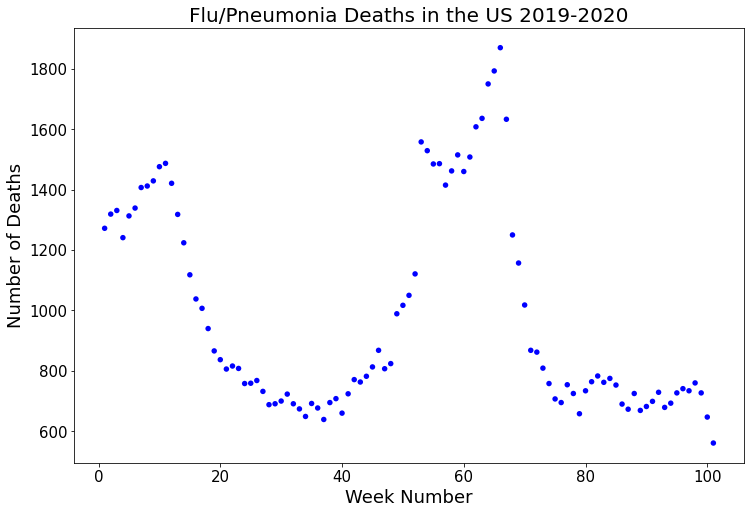

In [26]:
#creating a scatterplot of differences in deaths related to the flu and pneumonia over all weeks of 2019-2020

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(usdf['MMWR Week'], usdf['Influenza and pneumonia (J09-J18)'],
            c='blue', edgecolors='none', s=30)
plt.title("Flu/Pneumonia Deaths in the US 2019-2020", fontsize=20)
axs.set_xlabel("Week Number", fontsize=18)
axs.set_ylabel("Number of Deaths", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [29]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = usdf['MMWR Week'].values
y_vals = usdf['Influenza and pneumonia (J09-J18)']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Influenza and pneumonia (J09-J18)   R-squared:                       0.090
Model:                                           OLS   Adj. R-squared:                  0.081
Method:                                Least Squares   F-statistic:                     9.775
Date:                               Wed, 23 Dec 2020   Prob (F-statistic):            0.00232
Time:                                       19:01:52   Log-Likelihood:                -727.58
No. Observations:                                101   AIC:                             1459.
Df Residuals:                                     99   BIC:                             1464.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1162.3240     65.881     17.643      0.000    1031.602    1293.046
x1            -3.5063      1.121     -3.126      0.002      -5.731      -1.281
==============================================================================
Omnibus:                       15.142   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.768
Skew:                           1.025   Prob(JB):                     0.000139
Kurtosis:                       3.148   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#this code will add a regression line to my graph of the deaths

b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(usdf['MMWR Week']),
                     np.max(usdf['MMWR Week']), 100)

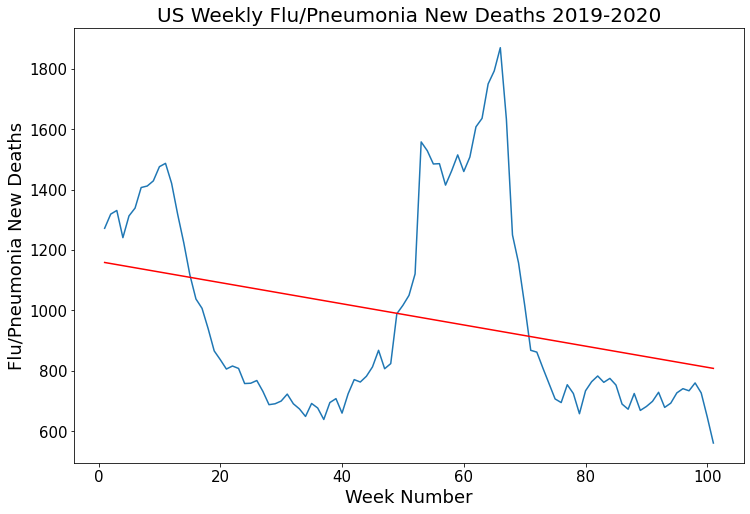

In [31]:
#creating a line graph with a regression line to better see the trend using the data 

fig, axs = plt.subplots(figsize=(12,8))
axs.plot(usdf['MMWR Week'], usdf['Influenza and pneumonia (J09-J18)'])

axs.plot(x_plot, x_plot*b1 + b0, color='red') #this code specifys the regression line defined above

plt.title('US Weekly Flu/Pneumonia New Deaths 2019-2020', fontsize=20)
axs.set_xlabel('Week Number', fontsize=18)
axs.set_ylabel('Flu/Pneumonia New Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [32]:
#A statistically significant regression line was obtained (Prob(F-statistic) < 0.002)

In [33]:
#next I will conduct a chi squared test to determine if there is a relationship between prevalence of diabetes
#and race. 

In [34]:
#loading dataset I will use for my analysis
df3 = pd.read_csv(r'/Users/jankrovatin/Desktop/NHANES.csv')

In [35]:
df3

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregntNow
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,71225,2011_12,male,0,0-9,1.0,Mexican,Mexican,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,71463,2011_12,male,0,0-9,4.0,Mexican,Mexican,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,71684,2011_12,male,0,0-9,3.0,White,White,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,71754,2011_12,male,0,0-9,0.0,White,White,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#crating a dataframe to view the variable of interest
df3 = df3[['Race3', 'Diabetes']]

In [37]:
#dropping NaNs
df3.dropna()

,Race3,Diabetes
4535,Asian,0.0
4536,Black,0.0
4537,White,0.0
4538,White,0.0
4539,White,0.0
...,...,...
9853,White,1.0
9854,White,1.0
9855,Mexican,1.0
9856,White,1.0


In [38]:
#classifying data based on which category each row falls into
def function(row):
    if row['Diabetes'] == 0.0:
        return 'Healthy'
    elif row['Diabetes'] == 1.0:
        return 'Diabetic'
    else:
        return 'Unknown'

In [39]:
#adding a row to my frequency table to reflect the values coded above
df3['Diabetes'] = df3.apply(function, axis=1)
df3

<ipython-input-39-3ef1b44a3e1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Diabetes'] = df3.apply(function, axis=1)


,Race3,Diabetes
0,NaN,Healthy
1,NaN,Healthy
2,NaN,Healthy
3,NaN,Healthy
4,NaN,Healthy
...,...,...
9995,Mexican,Unknown
9996,Mexican,Unknown
9997,White,Unknown
9998,White,Unknown


In [40]:
#reordering my frequency table
df3 = pd.crosstab(index=df3["Diabetes"], columns=df3["Race3"]) 
df3

Race3,Asian,Black,Hispanic,Mexican,Other,White
Diabetes,,,,,,
Diabetic,23,65,27,28,12,218
Healthy,261,519,319,441,141,2882
Unknown,4,5,4,11,5,35


In [41]:
#creating percentages for my frequency table so proportions can be more accurately represented on the graph

df3['Asian_per'] = df3['Asian'] / sum(df3['Asian'])
df3['Black_per'] = df3['Black'] / sum(df3['Black'])
df3['Hispanic_per'] = df3['Hispanic'] / sum(df3['Hispanic'])
df3['Mexican_per'] = df3['Mexican'] / sum(df3['Mexican'])
df3['Other_per'] = df3['Other'] / sum(df3['Other'])
df3['White_per'] = df3['White'] / sum(df3['White'])

In [42]:
#viewing my data table to ensure that the percentages appear
df3

Race3,Asian,Black,Hispanic,Mexican,Other,White,Asian_per,Black_per,Hispanic_per,Mexican_per,Other_per,White_per
Diabetes,,,,,,,,,,,,
Diabetic,23,65,27,28,12,218,0.079861,0.110357,0.077143,0.058333,0.075949,0.069537
Healthy,261,519,319,441,141,2882,0.906250,0.881154,0.911429,0.918750,0.892405,0.919298
Unknown,4,5,4,11,5,35,0.013889,0.008489,0.011429,0.022917,0.031646,0.011164


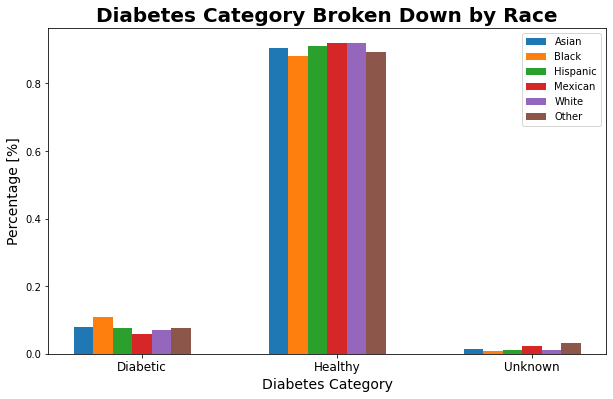

In [43]:
labels = ['Diabetic', 'Healthy', 'Unknown'] # Specify the x-axis labels here
y_value1 = df3['Asian_per'] # List of y-values from 1st category
y_value2 = df3['Black_per'] # List of y-values from 2nd category
y_value3 = df3['Hispanic_per'] # List of y-values from 3rd category
y_value4 = df3['Mexican_per'] # List of y-values from 4th category
y_value5 = df3['White_per']
y_value6 = df3['Other_per']

x = np.arange(len(labels))
width = 0.1  # the width of the bars
# I will change the width here to be a smaller number

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y_value1, width, label='Asian')
ax.bar(x + width, y_value2, width, label='Black')
ax.bar(x + 2 * width, y_value3, width, label='Hispanic') # Notice that I added 2*width
ax.bar(x + 3 * width, y_value4, width, label='Mexican') # I added 3*width
ax.bar(x + 4 * width, y_value5, width, label='White')
ax.bar(x + 5 * width, y_value6, width, label='Other')

ax.set_ylabel('Percentage [%]', fontsize=14)
ax.set_xlabel('Diabetes Category', fontsize=14)
ax.set_title('Diabetes Category Broken Down by Race',
             fontsize=20, fontweight='bold')
ax.set_xticks(x + (6*width)/2) # Only change the number '4' to the number of values that you have
ax.set_xticklabels(labels, fontsize=12)
ax.legend()


plt.show()